In [1]:
!pip install surprise

In [2]:
# i = 8
# j = 9
# i + j

In [3]:
import pandas as pd
# import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

from sklearn.model_selection import GroupKFold
from surprise.model_selection import PredefinedKFold
# from scipy.stats import permutation_test
from sklearn.model_selection import train_test_split
from surprise import Dataset, SVD
from surprise import Dataset, NormalPredictor, Reader
from surprise.model_selection import cross_validate
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import cohen_kappa_score, mean_absolute_error , mean_squared_error

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
books = pd.read_csv("/kaggle/input/bookrecommender/BX-Books_small.csv",encoding='ISO-8859–1',delimiter=";",warn_bad_lines=True, error_bad_lines=False)

/tmp/ipykernel_20/2660216152.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv("/kaggle/input/bookrecommender/BX-Books_small.csv",encoding='ISO-8859–1',delimiter=";",warn_bad_lines=True, error_bad_lines=False)
/tmp/ipykernel_20/2660216152.py:1: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv("/kaggle/input/bookrecommender/BX-Books_small.csv",encoding='ISO-8859–1',delimiter=";",warn_bad_lines=True, error_bad_lines=False)
Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10



In [5]:
ratings = pd.read_csv("/kaggle/input/bookrecommender/BX-Book-Ratings.csv",encoding='ISO-8859–1',delimiter=";")
# books = pd.read_csv("BX-Books_small.csv",encoding='ISO-8859–1',delimiter=";")
users = pd.read_csv("/kaggle/input/bookrecommender/BX-Users.csv",encoding='ISO-8859–1',delimiter=";")

(array([244865.,      0.,      0.,      0.,      0.,    779.,      0.,
             0.,      0.,      0.,   1034.,      0.,      0.,      0.,
             0.,   2260.,      0.,      0.,      0.,      0.,   3344.,
             0.,      0.,      0.,      0.,  17784.,      0.,      0.,
             0.,      0.,  14118.,      0.,      0.,      0.,      0.,
         29456.,      0.,      0.,      0.,      0.,  38974.,      0.,
             0.,      0.,      0.,  24363.,      0.,      0.,      0.,
         29832.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ]),
 <BarContainer object of 50 artists>)

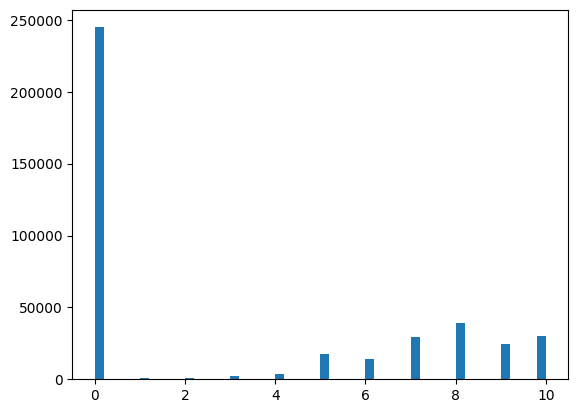

In [6]:
plt.hist(ratings['Book-Rating'],bins=50)

In [7]:
ratings_grp = ratings.groupby(by="ISBN",as_index=False).count()
ratings_grp

,ISBN,User-ID,Book-Rating
0,0330299891,1,1
1,0375404120,1,1
2,0586045007,1,1
3,9022906116,2,2
4,9032803328,1,1
...,...,...,...
176600,"\8804501367\""""",1,1
176601,`3502103682,1,1
176602,b00005wz75,1,1
176603,§423350229,1,1


<AxesSubplot: >

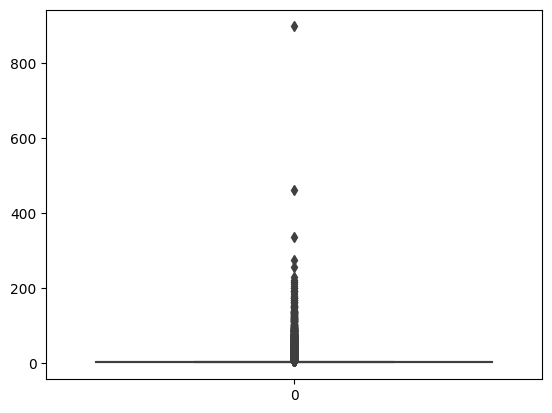

In [8]:
sns.boxplot(ratings_grp['Book-Rating'])
# plt.hist(ratings_grp['Book-Rating'],bins=50)

In [9]:
ratings = ratings.rename(columns={"User-ID":"userID",
                                  "ISBN":"itemID",
                                  "Book-Rating":"rating"})
ratings['userID'] = ratings['userID'].astype(str)
ratings['itemID'] = ratings['itemID'].astype(str)
ratings['rating'] = ratings['rating'].astype(int)

ratings_grp = ratings.groupby(by="itemID",as_index=False).count()
ratings_grp = ratings_grp.loc[ratings_grp.userID > 10, :]
ratings = ratings.loc[ratings.itemID.isin(ratings_grp['itemID']),:]

ratings_grp2 = ratings.groupby(by="userID",as_index=False).count()
ratings_grp2 = ratings_grp2.loc[ratings_grp2.itemID > 10, :]
ratings = ratings.loc[ratings.userID.isin(ratings_grp2['userID']),:]

In [10]:
len(ratings)

81330

(array([3.56e+03, 5.68e+02, 2.27e+02, 8.70e+01, 6.20e+01, 2.30e+01,
        2.50e+01, 1.40e+01, 7.00e+00, 7.00e+00, 6.00e+00, 4.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00]),
 array([ 11.  ,  28.74,  46.48,  64.22,  81.96,  99.7 , 117.44, 135.18,
        152.92, 170.66, 188.4 , 206.14, 223.88, 241.62, 259.36, 277.1 ,
        294.84, 312.58, 330.32, 348.06, 365.8 , 383.54, 401.28, 419.02,
        436.76, 454.5 , 472.24, 489.98, 507.72, 525.46, 543.2 , 560.94,
        578.68, 596.42, 614.16, 631.9 , 649.64, 667.38, 685.12, 702.86,
        720.6 , 738.34, 756.08, 773.82, 791.56, 809.3 , 827.04, 84

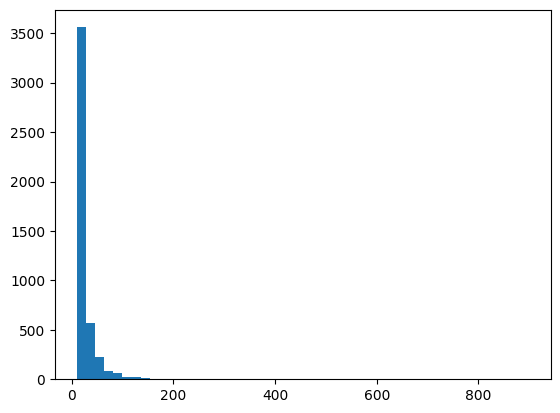

In [11]:
plt.hist(ratings_grp['userID'],bins=50)

In [12]:
!mkdir reco_folds

In [13]:
len(ratings)

81330

In [14]:
group_kfold = GroupKFold(n_splits=5)
group_kfold.get_n_splits(ratings[['userID','itemID']], ratings['rating'], ratings['userID'])

print(group_kfold)
train_X = None
train_y = None

test_X = None
test_y = None

result_df = pd.DataFrame([])


for i, (train_index, test_index) in enumerate(group_kfold.split(ratings[['userID','itemID','rating']], ratings['rating'], ratings['userID'])):
    train_X = ratings[['userID','itemID','rating']].iloc[train_index,:]
    train_X.to_csv(f"/kaggle/working/reco_folds/train_X_fold{i}.csv",index=False, sep=';')
    
    test_X = ratings[['userID','itemID','rating']].iloc[test_index,:]
    test_X.to_csv(f"/kaggle/working/reco_folds/test_X_fold{i}.csv",index=False, sep=';')
    
    

GroupKFold(n_splits=5)


In [15]:
from collections import defaultdict

from surprise import Dataset, SVD


def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [16]:
from collections import defaultdict

from surprise import Dataset, SVD
from surprise.model_selection import KFold


def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

In [17]:
from surprise import accuracy, Dataset, SVD
from surprise.model_selection import KFold


train_file = "/kaggle/working/reco_folds/train_X_fold%d.csv"
test_file = "/kaggle/working/reco_folds/test_X_fold%d.csv"
folds_files = [(train_file % i, test_file % i) for i in (0, 1,2,3,4)]
               
csv_reader = Reader(line_format='user item rating', sep=";", rating_scale=(1, 10), skip_lines =1)
data = Dataset.load_from_folds(folds_files, reader=csv_reader)
kf = PredefinedKFold()
               
# define a cross-validation iterator
# kf = KFold(n_splits=5)



for trainset, testset in kf.split(data):
    algo = SVD(n_epochs=100,n_factors=10)
#     print(testset)
    npy_test = np.array(testset)
    print(f"*********** npy_test.shape : {npy_test.shape}")
    df_test = pd.DataFrame(npy_test,columns=['userID','itemID','rating'])
    train_uids = []
    for usr in trainset.all_users():
#         print(f"************* to_raw_uid(usr) : {trainset.to_raw_uid(usr)}")
        train_uids.append(trainset.to_raw_uid(usr))
    
#     npy_train = np.array(trainset)
#     print(f"*********** npy_train.shape : {trainset}")
#     df_train = pd.DataFrame(npy_train,columns=['userID','itemID','rating'])
    
    print(f" Overlapping test train : {len(df_test.loc[df_test['userID'].isin(train_uids),:])}")
#     print(f" Overlapping train test : {len(df_train.loc[df_train['userID'].isin(df_test['userID']),:])}")
#     print(npy)
    # train and test algorithm.
    algo.fit(trainset)
    pred_lst = []
    for i in range(len(npy_test)):
        predictions = algo.predict(npy_test[i,0],npy_test[i,1])
#         print(npy_test[i,2]," ",predictions[3])
        pred_lst.append(predictions[3])
        
    predictions = algo.test(testset)
#     print(predictions)
    top_n = get_top_n(predictions, n=10)

    # Print the recommended items for each user
#     for uid, user_ratings in top_n.items():
#         print(uid, [iid for (iid, _) in user_ratings])
    
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)

    # Precision and recall can then be averaged over all users
    print("************* Precision@k :",sum(prec for prec in precisions.values()) / len(precisions))
    print("************* Recall@k :",sum(rec for rec in recalls.values()) / len(recalls))
    
#     print(f"************* npy[:,2] : {npy[:,2].astype(float)}")
#     print(f"************* pred_lst : {pred_lst}")
#     break
    print(f"************* cohen_kappa_score : {cohen_kappa_score(npy_test[:,2].astype(float).astype(int),np.round(pred_lst))}")
    print(f"************* mean_absolute_error : {mean_absolute_error(npy_test[:,2].astype(float),pred_lst)}")
    print(f"************* mean_squared_error : {mean_squared_error(npy_test[:,2].astype(float),pred_lst)}")
#     break

*********** npy_test.shape : (16264, 3)
 Overlapping test train : 0
************* Precision@k : 0.361681772406848
************* Recall@k : 0.07794135363724984
************* cohen_kappa_score : -0.0003736203172117758
************* mean_absolute_error : 3.5786104980152484
************* mean_squared_error : 15.991412517934002
*********** npy_test.shape : (16264, 3)
 Overlapping test train : 0
************* Precision@k : 0.3481037924151696
************* Recall@k : 0.0779066520033062
************* cohen_kappa_score : -0.00020046670696127755
************* mean_absolute_error : 3.447492379329532
************* mean_squared_error : 14.514662383378859
*********** npy_test.shape : (16264, 3)
 Overlapping test train : 0
************* Precision@k : 0.33937125748503005
************* Recall@k : 0.07127819788404834
************* cohen_kappa_score : -0.00020564742285489324
************* mean_absolute_error : 3.4394944385166153
************* mean_squared_error : 14.582253477929934
*********** npy_test.s

In [18]:
ratings

,userID,itemID,rating
413,276925,002542730X,10
422,276925,0151010633,0
426,276925,0316666343,0
427,276925,0345391810,0
429,276925,0385504209,8
...,...,...,...
406428,98391,0312284683,9
406475,98391,0312289723,10
406544,98391,0312303467,10
406567,98391,0312305060,8


In [19]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 10))

# The columns must correspond to user id, item id and ratings (in that order).
ratings_ds = Dataset.load_from_df(ratings[["userID", "itemID", "rating"]], reader)

In [20]:
algo = SVD(n_epochs=100,n_factors=10)
algo.fit(ratings_ds.build_full_trainset())

In [21]:
import pickle
# Open a file and use dump()
with open('svd.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(algo, file)

In [22]:
result = algo.predict("276925","002542730X")
result

Prediction(uid='276925', iid='002542730X', r_ui=None, est=8.069756656350382, details={'was_impossible': False})

In [23]:
result

Prediction(uid='276925', iid='002542730X', r_ui=None, est=8.069756656350382, details={'was_impossible': False})

In [24]:
result_pred = get_top_n([result,result])
result_pred

defaultdict(list,
            {'276925': [('002542730X', 8.069756656350382),
              ('002542730X', 8.069756656350382)]})

In [25]:
pd.DataFrame(result_pred["276925"])

,0,1
0,002542730X,8.069757
1,002542730X,8.069757
